In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/Credit Card Customer Data.csv')
dataset

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [ ]:
X = dataset[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
X = StandardScaler().fit_transform(X)

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

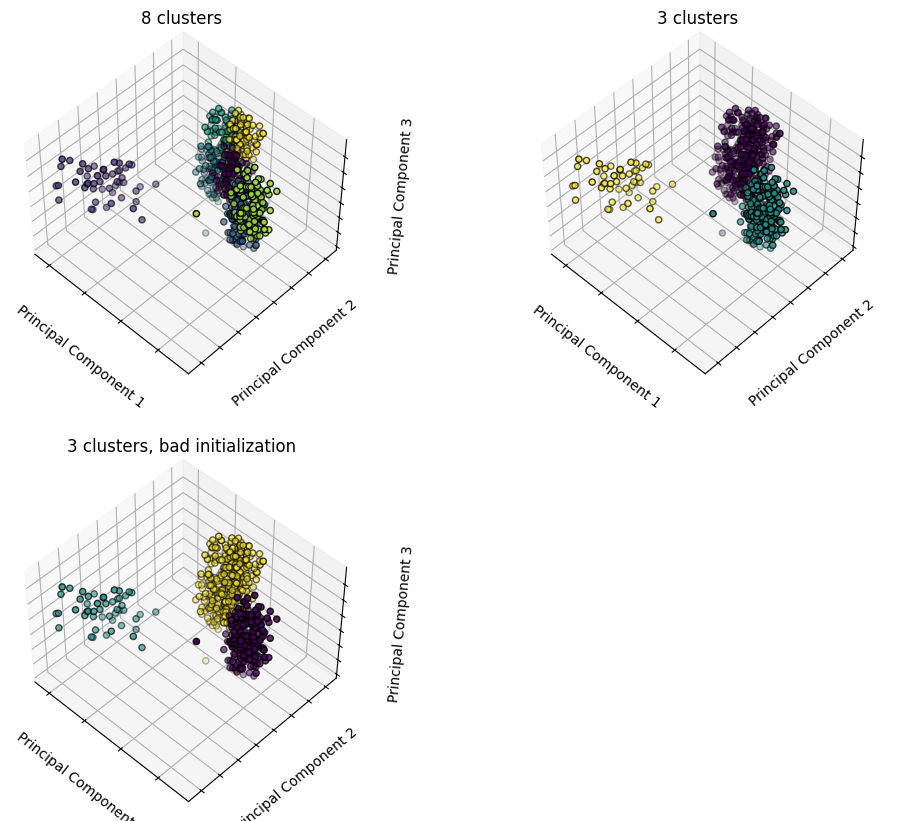

In [ ]:
# Используем PCA для уменьшения размерности до 3 признаков
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Настроим алгоритмы кластеризации
estimators = [
    ("k_means_8_clusters", KMeans(n_clusters=8)),
    ("k_means_3_clusters", KMeans(n_clusters=3)),
    ("k_means_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(12, 10))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X_pca)
    labels = est.labels_

    # Визуализируем данные с кластерами
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.set_title(title)

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

Best number of clusters: 3
Best silhouette score: 0.5157182558881063
Best adjusted rand score: -1


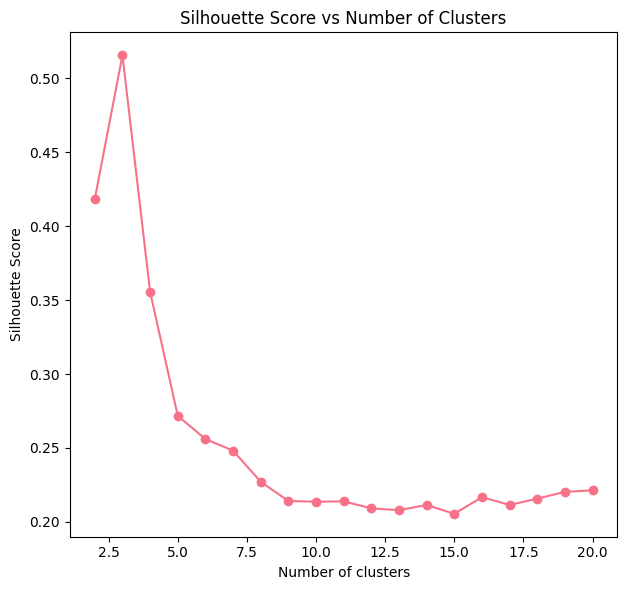

In [ ]:
y = None  # Или если у вас есть метки, замените None на 'y = data["target_column"]'

n_clusters = np.arange(2, 21)
best_metric = [0, -1, -1,[]]  # [n_clusters, min_silhouette, max_ari, best_cluster_centers]

silhouette_score_values = []
adjusted_rand_score_values = []

for n in n_clusters:
    # Создаем модель KMeans для текущего числа кластеров
    clusterer = KMeans(n_clusters=n, max_iter=300, n_init=10, random_state=42)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    # Вычисляем silhouette score
    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    # Adjusted Rand Score можно рассчитать, если есть истинные метки (y). Если нет, пропускаем этот шаг.
    if y is not None:
        score2 = metrics.adjusted_rand_score(y, y_pred)
        adjusted_rand_score_values.append(score2)
    else:
        score2 = -1  # Если меток нет, устанавливаем отрицательное значение для ARI (так как он будет не определен)

    # Обновляем лучшую модель, если найдено лучшее сочетание
    if score1 > best_metric[1] and (score2 > best_metric[2] or y is None):
        best_metric[1] = score1
        best_metric[2] = score2
        best_metric[3] = clusterer.cluster_centers_
        best_metric[0] = n

# Выводим результаты
print(f"Best number of clusters: {best_metric[0]}")
print(f"Best silhouette score: {best_metric[1]}")
print(f"Best adjusted rand score: {best_metric[2]}")

# Рисуем графики для silhouette scores и adjusted rand scores
plt.figure(figsize=(12, 6))

# Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(n_clusters, silhouette_score_values, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

# Adjusted Rand Score (если есть целевая переменная)
if y is not None:
    plt.subplot(1, 2, 2)
    plt.plot(n_clusters, adjusted_rand_score_values, marker='o')
    plt.title("Adjusted Rand Score vs Number of Clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Adjusted Rand Score")

plt.tight_layout()
plt.show()

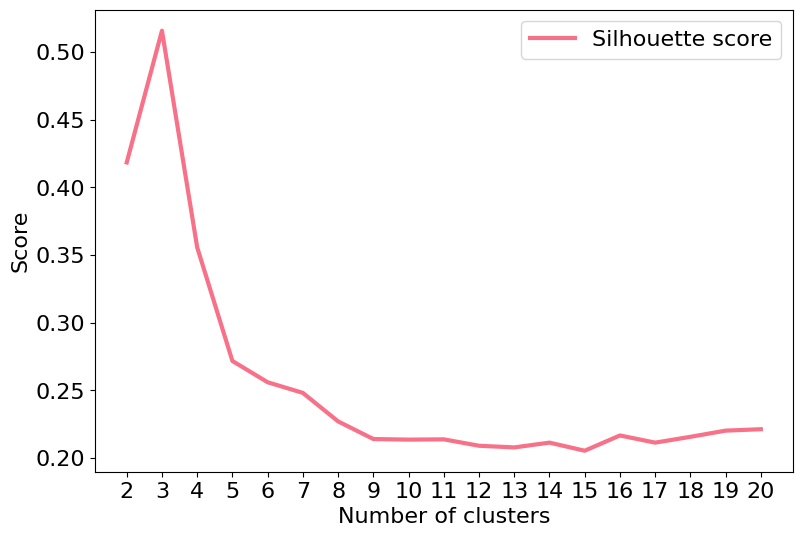

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

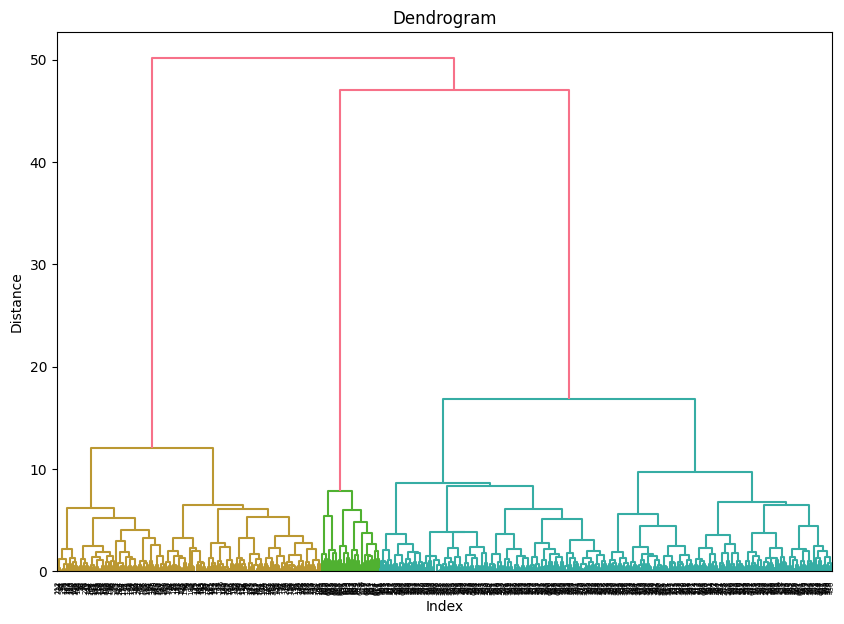

In [ ]:
linked = linkage(X, 'ward')
# Визуализация дендограммы
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
mins = X.shape[1]

<ipython-input-41-4b554a7798eb>:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=col, edgecolor='k', s=40, marker='x', label=f"Cluster {k} (border)")


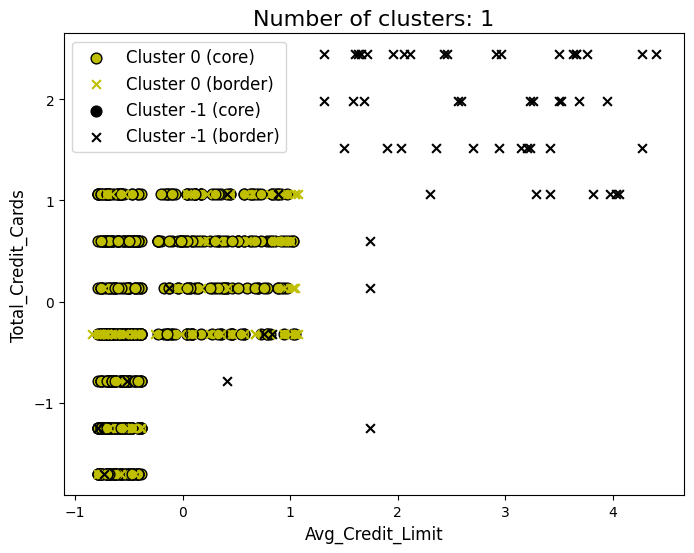

In [ ]:
db = DBSCAN(eps=0.7, min_samples=7).fit(X_scaled)

# Маска для определения "ядра" (core) точек
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Получаем метки кластеров
labels = db.labels_

# Количество кластеров, игнорируя выбросы (метка -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# График результатов
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'c', 'm', 'orange']  # можно добавить больше цветов для большего числа кластеров

# Рисуем кластеры
plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Черный для шума
        col = 'k'

    # Маска для точек, принадлежащих текущему кластеру
    class_member_mask = (labels == k)

    # Точки, принадлежащие ядру кластера
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, edgecolor='k', s=60, marker='o', label=f"Cluster {k} (core)")

    # Точки, являющиеся пограничными для текущего кластера
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, edgecolor='k', s=40, marker='x', label=f"Cluster {k} (border)")

# Добавим заголовок и легенду
plt.title(f'Number of clusters: {n_clusters_}', fontsize=16)
plt.xlabel('Avg_Credit_Limit', fontsize=12)
plt.ylabel('Total_Credit_Cards', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.show()

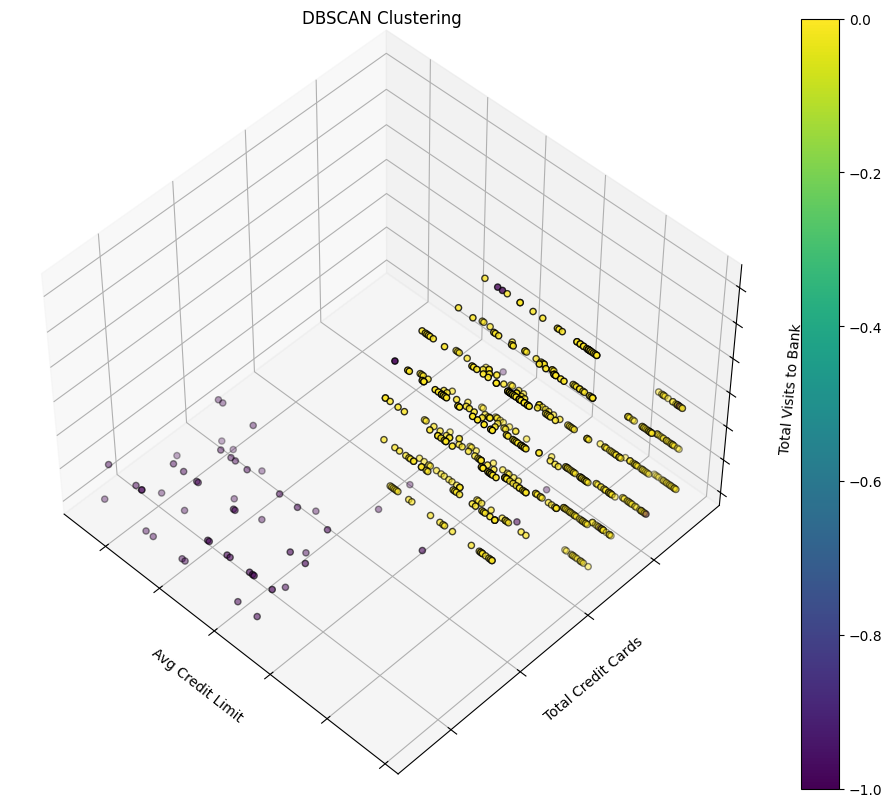

In [54]:
# Применяем DBSCAN для кластеризации
db = DBSCAN(eps=0.7, min_samples=7).fit(X)
labels = db.labels_

# Создаем 3D-график
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

# Строим точки с цветовой градацией по меткам кластеров
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', edgecolor="k")

# Отключаем отображение меток осей
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Настройка подписей осей
ax.set_xlabel("Avg Credit Limit")
ax.set_ylabel("Total Credit Cards")
ax.set_zlabel("Total Visits to Bank")

# Добавляем заголовок
ax.set_title("DBSCAN Clustering")

# Добавляем цветовую шкалу для визуализации кластеров
plt.colorbar(scatter)

# Покажем график
plt.show()